# Laboratorio 1: Árboles y random forest para regresión y clasificación


## 1. Análisis descriptivo de los datos

**Leemos los datos los datos del USA Housing Dataset**

In [1]:
!rm housing_train.csv
!wget https://raw.githubusercontent.com/MiguelJG/Lab1_AprendizajeAutomatico/main/housing_train.csv

rm: cannot remove 'housing_train.csv': No such file or directory
--2021-01-27 19:07:59--  https://raw.githubusercontent.com/MiguelJG/Lab1_AprendizajeAutomatico/main/housing_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462137 (451K) [text/plain]
Saving to: ‘housing_train.csv’

housing_train.csv   100%[===================>] 451.31K  --.-KB/s    in 0.02s   

2021-01-27 19:07:59 (17.7 MB/s) - ‘housing_train.csv’ saved [462137/462137]



In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

USA_Housing = pd.read_csv('housing_train.csv')
USA_Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
# Para conocer las dimensiones totales del fichero:
filas, columnas = USA_Housing.shape
print(USA_Housing.shape)

(1460, 81)


In [5]:
# Para visualizar sencillamente los nombres de todas las columnas:
print(USA_Housing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Para visualizar la información general del dataframe y saber si hay valores nulos
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**De las variables numéricas hallamos datos estadísticos: máximo, mínimo, media, mediana y cuartiles**

In [ ]:
USA_Housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**De las variables categóricas, listamos las diferentes categorías y hallamos la frecuencia de cada una de ellas**

In [115]:
USA_Housing_categorical = USA_Housing.select_dtypes(include=['object']).copy()

In [116]:
for column in USA_Housing_categorical:
    print("\n" + column)
    print(USA_Housing[column].value_counts())


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
Meadow

Las columnas en las que la mayoría de los datos corresponden a un mismo valor no nos aportan información.
Por este motivo, bajo el criterio de que cuando el 90% o más de los datos de una variable toman un mismo valor no es una variable útil para la predicción, se eliminan las columnas cuyos datos están muy concentrados en un valor y esa concentración supera el umbral del 90%.



In [117]:
USA_Housing[USA_Housing_categorical.columns].value_counts().max()/filas *100
to_drop = []
umbral = 90
for column in USA_Housing_categorical:
    if (USA_Housing_categorical[column].value_counts().max()/filas *100 >= umbral):
      to_drop.append(column)

In [118]:
# Las columnas que debemos eliminar según el criterio adoptado son las siguientes:
print(to_drop)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


In [119]:
# Eliminamos dichas columnas:
USA_Housing.drop(columns = to_drop, axis=1, inplace=True)

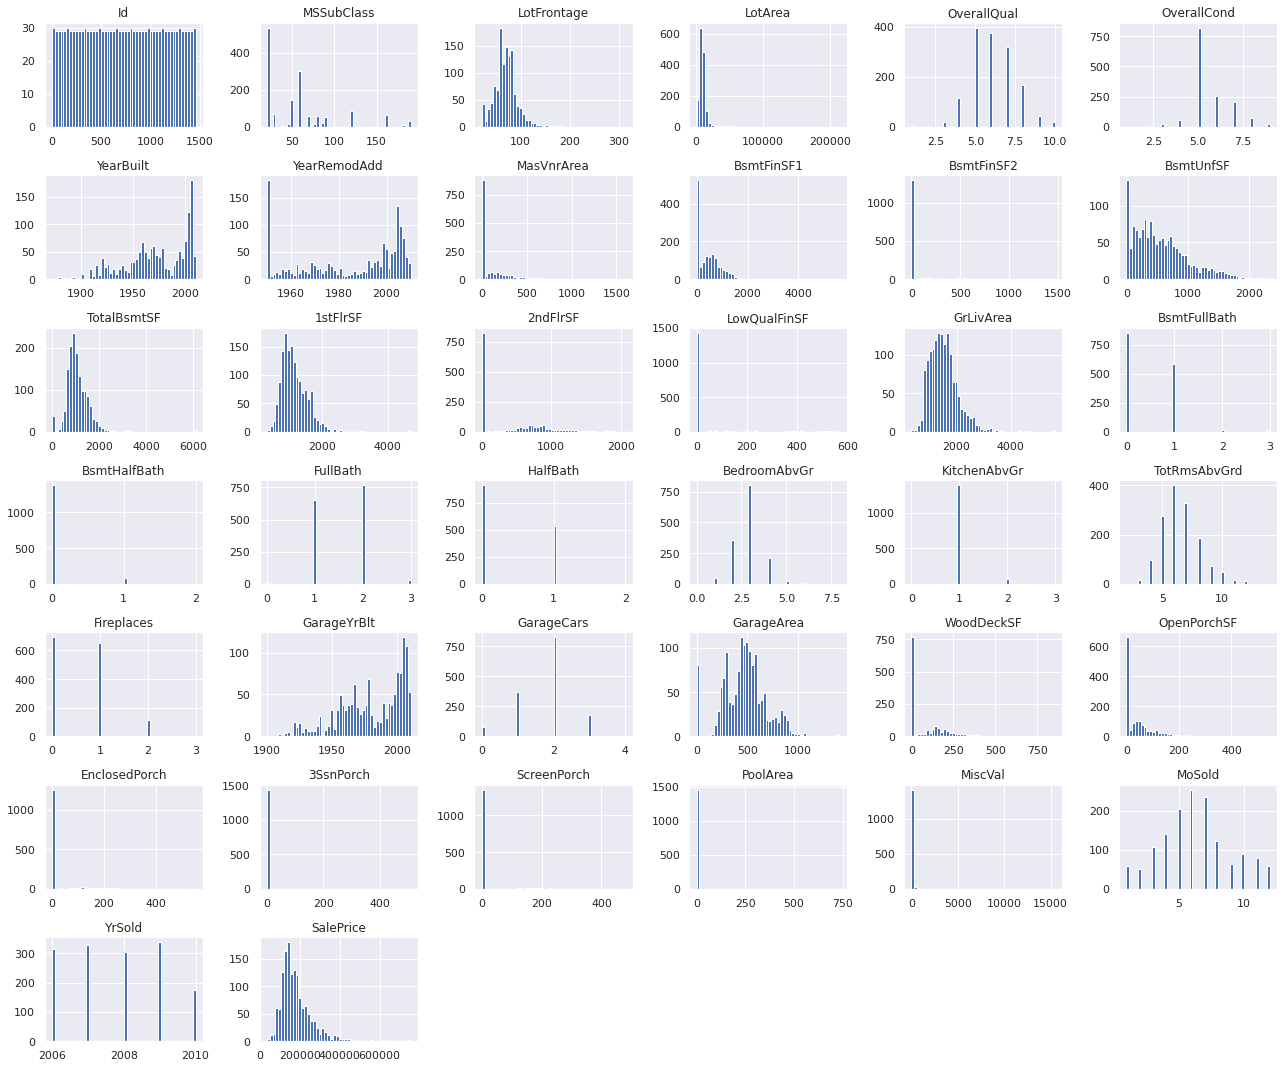

In [120]:
# Obtendremos los histogramas de las variables numéricas:

columns = USA_Housing.columns

USA_Housing[columns].hist(bins=50, figsize=(18,15))
plt.tight_layout()
plt.show()

En el caso de las columnas numéricas, como se puede apreciar en los histogramas, hay columnas que tienen sus valores muy concentrados en un sólo valor. Este tipo de columnas tampoco nos aportará la información que necesitamos. Por lo tanto, bajo el criterio de que si tanto el percentil 25% como el percentil 75% tienen el mismo valor los datos están muy concentrados en un mismo valor, se eliminarán columnas.

In [121]:
USA_Housing_numerical = USA_Housing.select_dtypes(exclude=['object']).copy()
to_drop_2 = []
for column in USA_Housing_numerical:
  if (USA_Housing_numerical[column].quantile(0.25) == USA_Housing_numerical[column].quantile(0.75)):
    to_drop_2.append(column)

In [122]:
# Las columnas que eliminaremos son las siguientes:
print(to_drop_2)

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [123]:
# Eliminamos dichas columnas:
USA_Housing.drop(columns = to_drop_2, axis=1, inplace=True)

In [124]:
# Además, la columna 'Id' tampoco nos aporta ninguna información. Por ello, la eliminaremos:
USA_Housing.drop('Id', axis=1, inplace=True)

In [125]:
# Las dimensiones actuales de nuestro dataframe son:
filas, columnas = USA_Housing.shape
USA_Housing.shape

(1460, 60)

**Creamos la matriz de correlaciones con las columnas numéricas**

In [17]:
USA_Housing_numerical = USA_Housing.select_dtypes(exclude=['object']).copy()

In [18]:
matriz_corr = USA_Housing_numerical.corr()

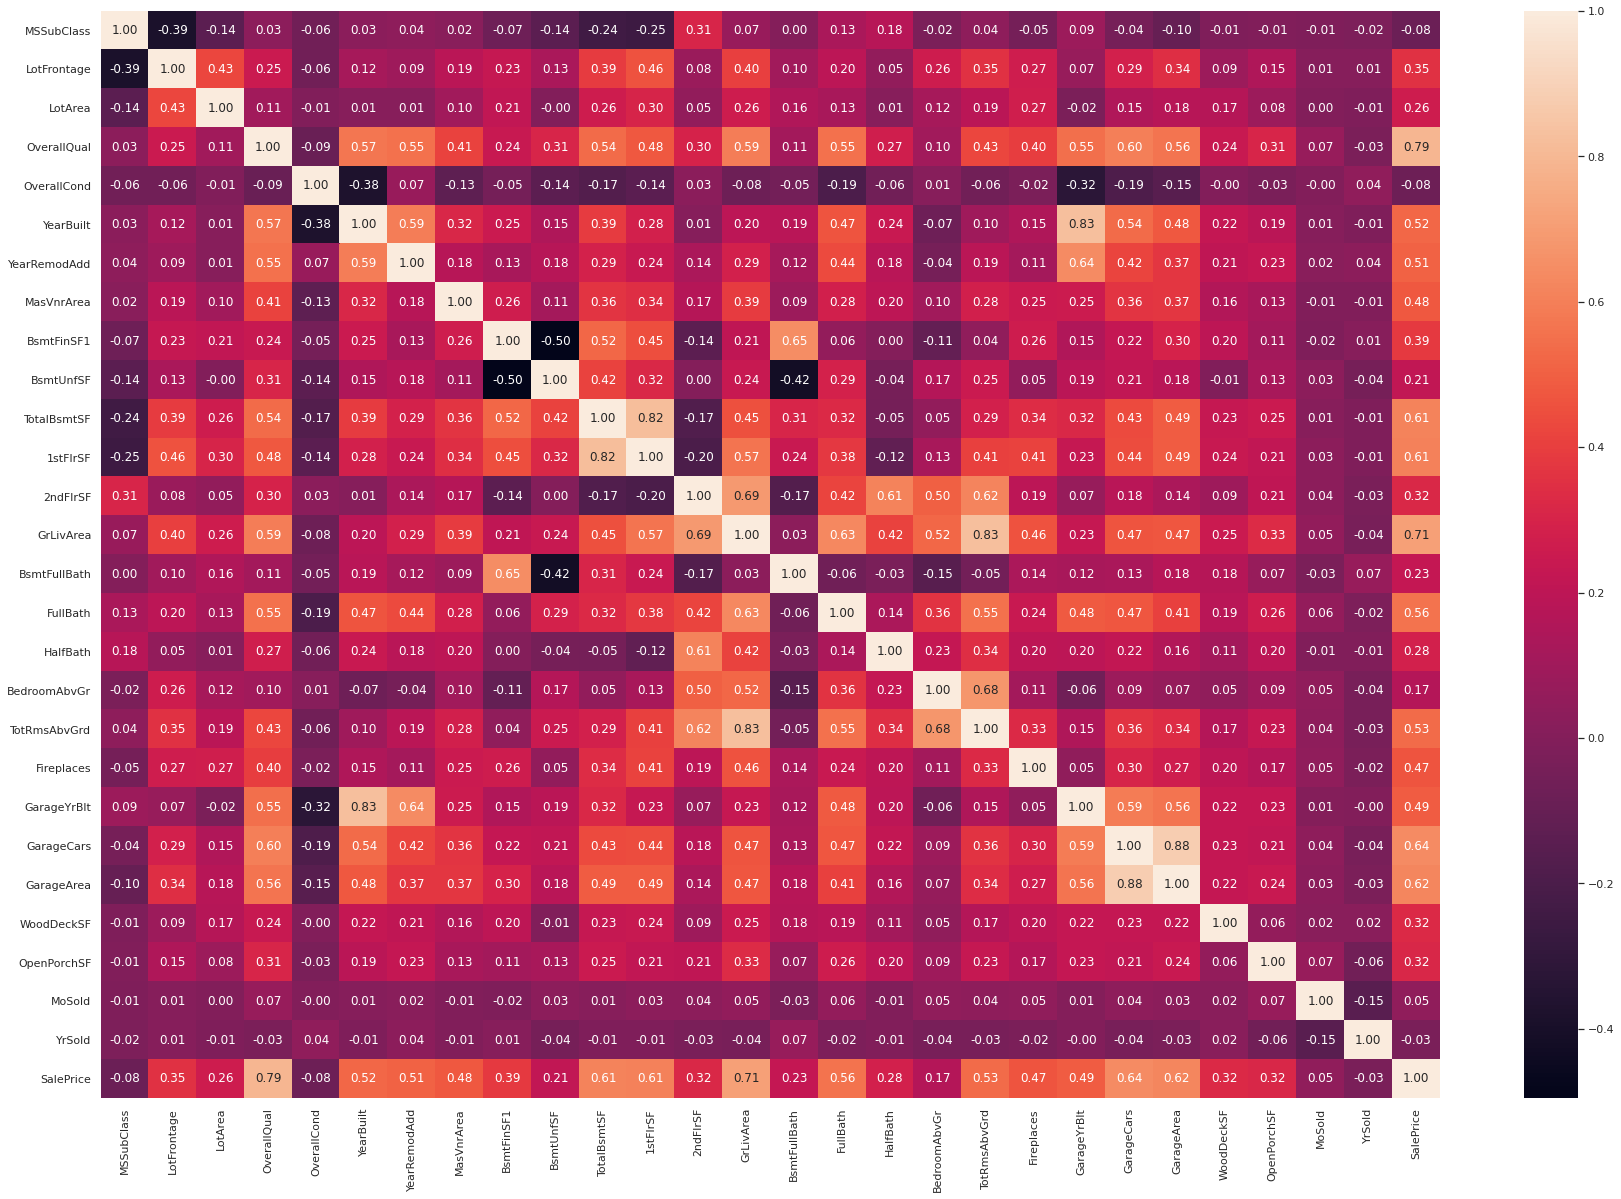

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(matriz_corr,annot=True, fmt='.2f');

**Encontramos las correlaciones más altas, que superen el 0.75**

In [126]:
parejas_correlacionadas = matriz_corr.unstack()
parejas_ordenadas = parejas_correlacionadas.sort_values(kind="quicksort")
parejas_ordenadas = parejas_ordenadas[parejas_ordenadas != 1]
parejas_corr_alta = parejas_ordenadas[parejas_ordenadas > 0.75]

tempSerie = pd.Series([],dtype="float64")
templist = []
for index_, value in parejas_corr_alta.items():
  if value not in templist:
    templist.append(value)
    tempSerie = tempSerie.append(parejas_corr_alta.loc[[index_]])

parejas_corr_alta = tempSerie
del(templist)
del(tempSerie)
print(parejas_corr_alta)

(OverallQual, SalePrice)     0.790982
(1stFlrSF, TotalBsmtSF)      0.819530
(TotRmsAbvGrd, GrLivArea)    0.825489
(GarageYrBlt, YearBuilt)     0.825667
(GarageArea, GarageCars)     0.882475
dtype: float64


**Revisamos las correlaciones más altas y decidimos si eliminar o no la columna**

In [127]:
# No se borra la variable OverallQual ya que está muy correlacionada con la variable que queremos predecir
to_drop = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars']

USA_Housing.drop(columns = to_drop, axis=1, inplace=True)

## 2. Tratamiento de missing

**Identificamos variables con valores faltantes e imprimimos la cantidad de datos faltantes en cada una**



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
MasVnrArea         8
dtype: int64


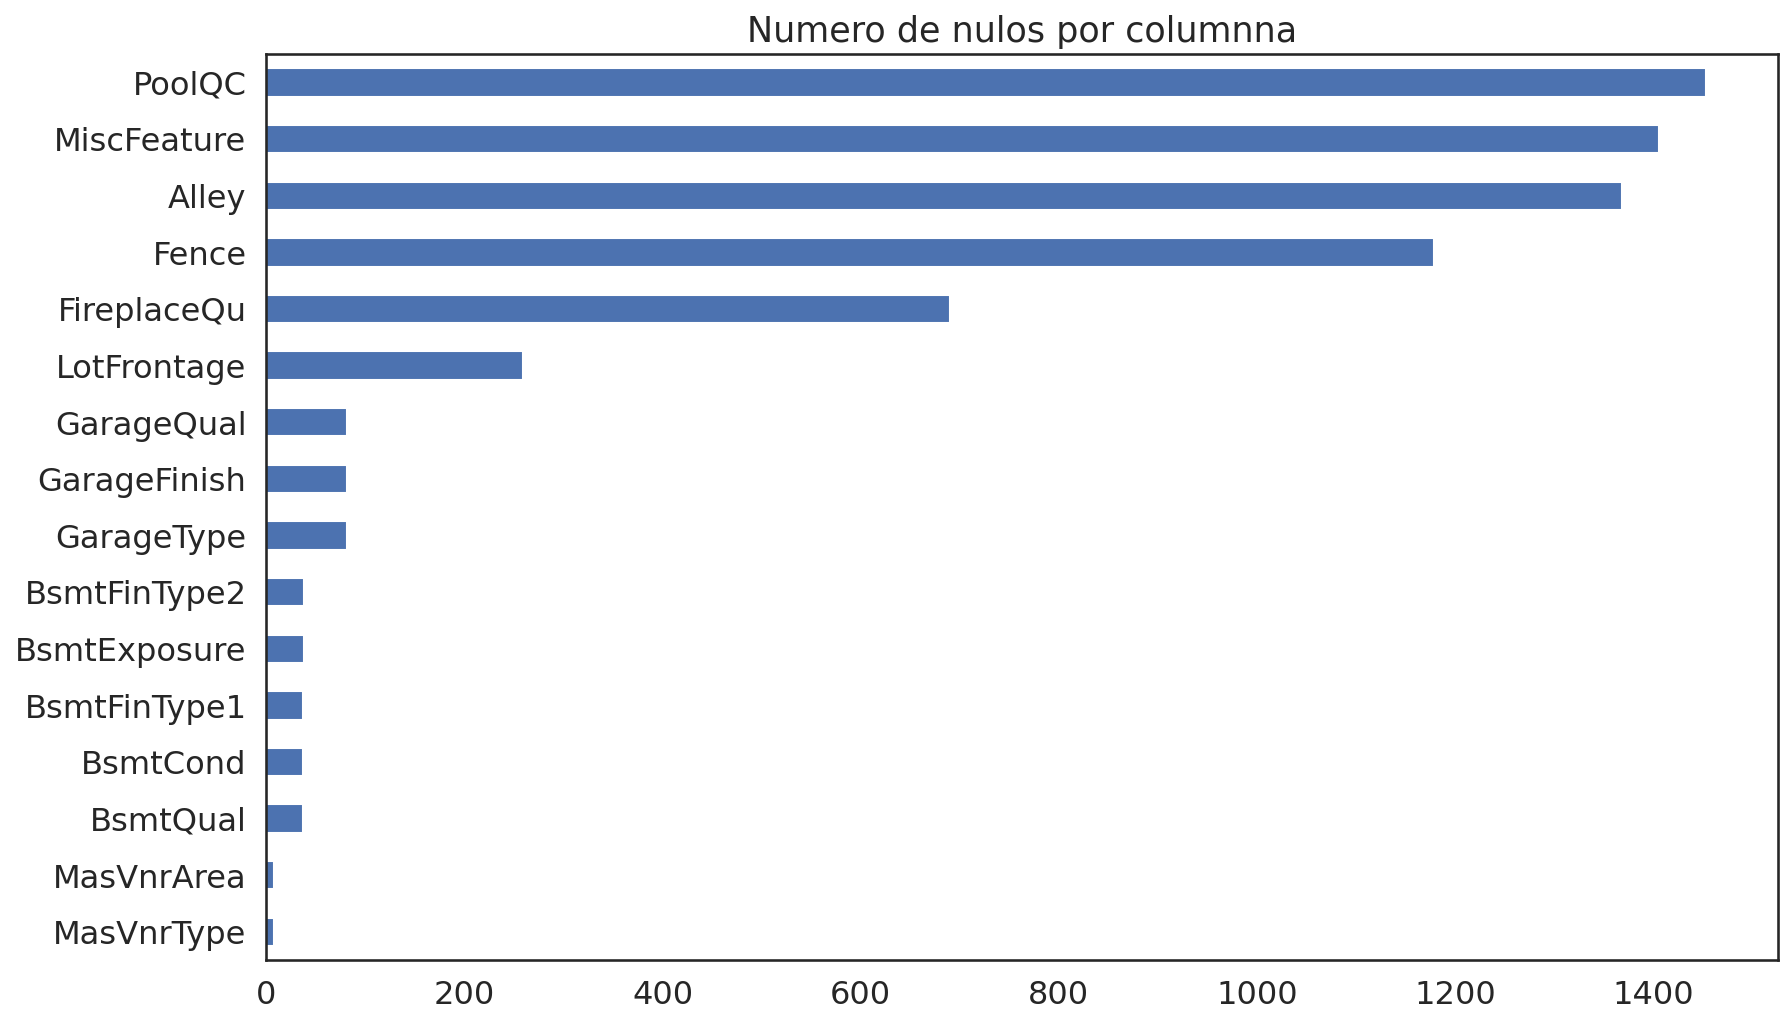

In [128]:
cols_with_missing = [col for col in USA_Housing.columns
                     if USA_Housing[col].isnull().any()]
missing_val_count_by_column = (USA_Housing.isnull().sum()).sort_values(ascending = False)
print(missing_val_count_by_column[missing_val_count_by_column > 0])

sns.set(font_scale=1.4)
sns.set_style("white")
nulos = USA_Housing.isna().sum()
nulos = nulos[nulos > 0].sort_values()
plt.figure(dpi=150)
nulos.plot(kind='barh', figsize=(13,8))
plt.title('Numero de nulos por columnna')
plt.show()

**Identificamos columnas con valores faltantes superiores al 10% de los datos y eliminamos esas columnas**

In [129]:
umbral = int(0.1*filas)
for i in USA_Housing.columns:
    if(USA_Housing[i].isnull().sum()>=umbral):
        USA_Housing.drop(i,inplace=True,axis=1)
        print(i)

LotFrontage
Alley
FireplaceQu
PoolQC
Fence
MiscFeature


**Identificamos NAs de variables que no superan el 10% de valores faltantes**

In [130]:
for col in USA_Housing.columns: 
    suma = sum(USA_Housing[col].isnull())
    if (suma>0):
        print ("columna:",col,"---- Nulos:",sum(USA_Housing[col].isnull()))

columna: MasVnrType ---- Nulos: 8
columna: MasVnrArea ---- Nulos: 8
columna: BsmtQual ---- Nulos: 37
columna: BsmtCond ---- Nulos: 37
columna: BsmtExposure ---- Nulos: 38
columna: BsmtFinType1 ---- Nulos: 37
columna: BsmtFinType2 ---- Nulos: 38
columna: GarageType ---- Nulos: 81
columna: GarageFinish ---- Nulos: 81
columna: GarageQual ---- Nulos: 81


**Analizamos las variables que tengan información sobre el garage, reemplazamos valores NA con una categoría adicional denominada "None"**

Si observamos los índices de los valores NA en las columnas relacionadas con el garage, vemos que son comunes para todas. Además, comparando los índices de las muestras que son nulas con el valor del área del garage en esos mismos índices, vemos que el área del garaje en esos casos es 0. Por lo tanto, podemos decir que no hay garaje y queda justificado sustituir por el valor None las muestras faltantes de las variables relacionadas con el garaje. 

In [132]:
# Imprimimos los índices correspondientes a los NA de la columna GarageFinish y el valor de GarageArea en esos casos:
USA_Housing['GarageArea'][np.where(USA_Housing['GarageFinish'].isnull())[0]]

39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageArea, Length: 81, dtype: int64

In [138]:
# Rellenamos las observaciones NA con None en las variables relacionadas con el garaje
columnas = ['GarageType', 'GarageFinish', 'GarageQual' ]
for i in columnas:
    USA_Housing[i] = USA_Housing[i].fillna(value='None')

**Analizamos el resto de variables y decidimos que criterio aplicar**

Para las variables relacionadas con el sótano aplicamos el mismo criterio en el cual comparamos los valores con los de la variable TotalBsmtSF (superfície total del sótano). Observamos que los valores de esta variable (TotalBsmtSF) son 0 para los índices de los valores faltantes de las variables relacionadas con el sótano y, por lo tanto, podemos substituirlos por None ya que entendemos que no hay sótano.

In [134]:
# Imprimimos los índices correspondientes a los NA de la columna BsmtCond y el valor de TotalBsmtSF en esos casos:
USA_Housing['TotalBsmtSF'][np.where(USA_Housing['BsmtCond'].isnull())[0]]

17      0
39      0
90      0
102     0
156     0
182     0
259     0
342     0
362     0
371     0
392     0
520     0
532     0
533     0
553     0
646     0
705     0
736     0
749     0
778     0
868     0
894     0
897     0
984     0
1000    0
1011    0
1035    0
1045    0
1048    0
1049    0
1090    0
1179    0
1216    0
1218    0
1232    0
1321    0
1412    0
Name: TotalBsmtSF, dtype: int64

In [139]:
# Rellenamos las observaciones NA con None en las variables relacionadas con el sótano.
columnas = ['BsmtQual', 'BsmtCond','BsmtExposure',  'BsmtFinType1', 
            'BsmtFinType1', 'BsmtFinType2']
for column in columnas:
    USA_Housing[column].fillna('None', inplace=True)

**Analizamos la variable MasVnrArea y decidimos cual es la mejor manera de llenar los valores NA**

In [135]:
# MasVnrType: tipo de revestimiento de mampostería
# MasVnrArea: área de revestimiento de mampostería en pies cuadrados
USA_Housing['MasVnrArea'].describe()
mode_MasVnrArea = USA_Housing['MasVnrArea'].mode()[0]

Reemplazamos los missing por la moda en la columna MasVnrArea y por None en MasVnrType. Por lo tanto, estaremos rellenando el área del revestimiento con 0 y añadiendo None al tipo de revestimiento en esos casos.

In [136]:
USA_Housing['MasVnrArea'].fillna(value=mode_MasVnrArea, inplace=True) 
USA_Housing['MasVnrType'].value_counts()
USA_Housing['MasVnrType'].fillna(value='None', inplace=True) 

**Verificamos que no existen valores NA en el conjunto de datos**

In [140]:
for col in USA_Housing.columns: 
    suma = sum(USA_Housing[col].isnull())
    if (suma>0):
        print ("column:",col,".Missing:",sum(USA_Housing[col].isnull()))

## 3. Problema de regresión

### 3.1. Con un árbol de decisión 

**Separamos la data en entrenamiento y test**

In [63]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [64]:
# Obtenemos las columnas categóricas
columns = USA_Housing.select_dtypes(include=['object']).columns
print(columns)
USA_Housing_1 = USA_Housing.copy()

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [65]:
USA_Housing_1.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,854,1710,1,2,1,3,Gd,0,Attchd,RFn,548,TA,0,61,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,0,1262,0,2,0,3,TA,1,Attchd,RFn,460,TA,298,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,866,1786,1,2,1,3,Gd,1,Attchd,RFn,608,TA,0,42,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,756,1717,1,1,0,3,Gd,1,Detchd,Unf,642,TA,0,35,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1053,2198,1,2,1,4,Gd,1,Attchd,RFn,836,TA,192,84,12,2008,WD,Normal,250000


In [66]:
# Get dummies
USA_Housing_1 = pd.get_dummies(USA_Housing, columns=columns, drop_first=True)
USA_Housing_1.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,150,856,854,1710,1,2,1,3,0,548,0,61,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,284,1262,0,1262,0,2,0,3,1,460,298,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,434,920,866,1786,1,2,1,3,1,608,0,42,9,2008,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,540,756,756,1717,1,1,0,3,1,642,0,35,2,2006,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,490,1145,1053,2198,1,2,1,4,1,836,192,84,12,2008,250000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
# Eliminamos la variable a predecir del vector de entrada
X = USA_Housing_1.drop(['SalePrice'], axis=1)  
y = USA_Housing_1['SalePrice']

In [68]:
# Dividimos los datos en 80% para entrenamiento y en 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
print("Total de muestras: " + str(USA_Housing.shape[0]))
print("Aprendizaje: " + str(len(X_train)), "(" + str(float(len(X_train))/USA_Housing.shape[0]*100) + "%)")
print("Test: " + str(len(X_test)), "(" + str(float(len(X_test))/USA_Housing.shape[0]*100) + "%)")

Total de muestras: 1460
Aprendizaje: 1168 (80.0%)
Test: 292 (20.0%)


**Analizamos si podar el árbol o no**

Utilizamos la función GridSearchCV para obtener los mejores valores de profundidad y número de hojas

In [70]:
dt = DecisionTreeRegressor(random_state=None)
dt_params = {'max_depth':np.arange(1,15,1),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params, cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_
print(a)

{'max_depth': 13, 'min_samples_leaf': 9}


**Creamos el árbol**

In [71]:
# Escogemos los mejores parámetros
arbol = DecisionTreeRegressor(random_state=None, max_leaf_nodes=14, max_depth=6)
arbol.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=14,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**Graficamos el árbol**

In [72]:
from sklearn import tree
r_texto = tree.export_text(arbol)

In [73]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import matplotlib.image as mpimg

dot_data = export_graphviz(arbol, feature_names =  X.columns.to_list())

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

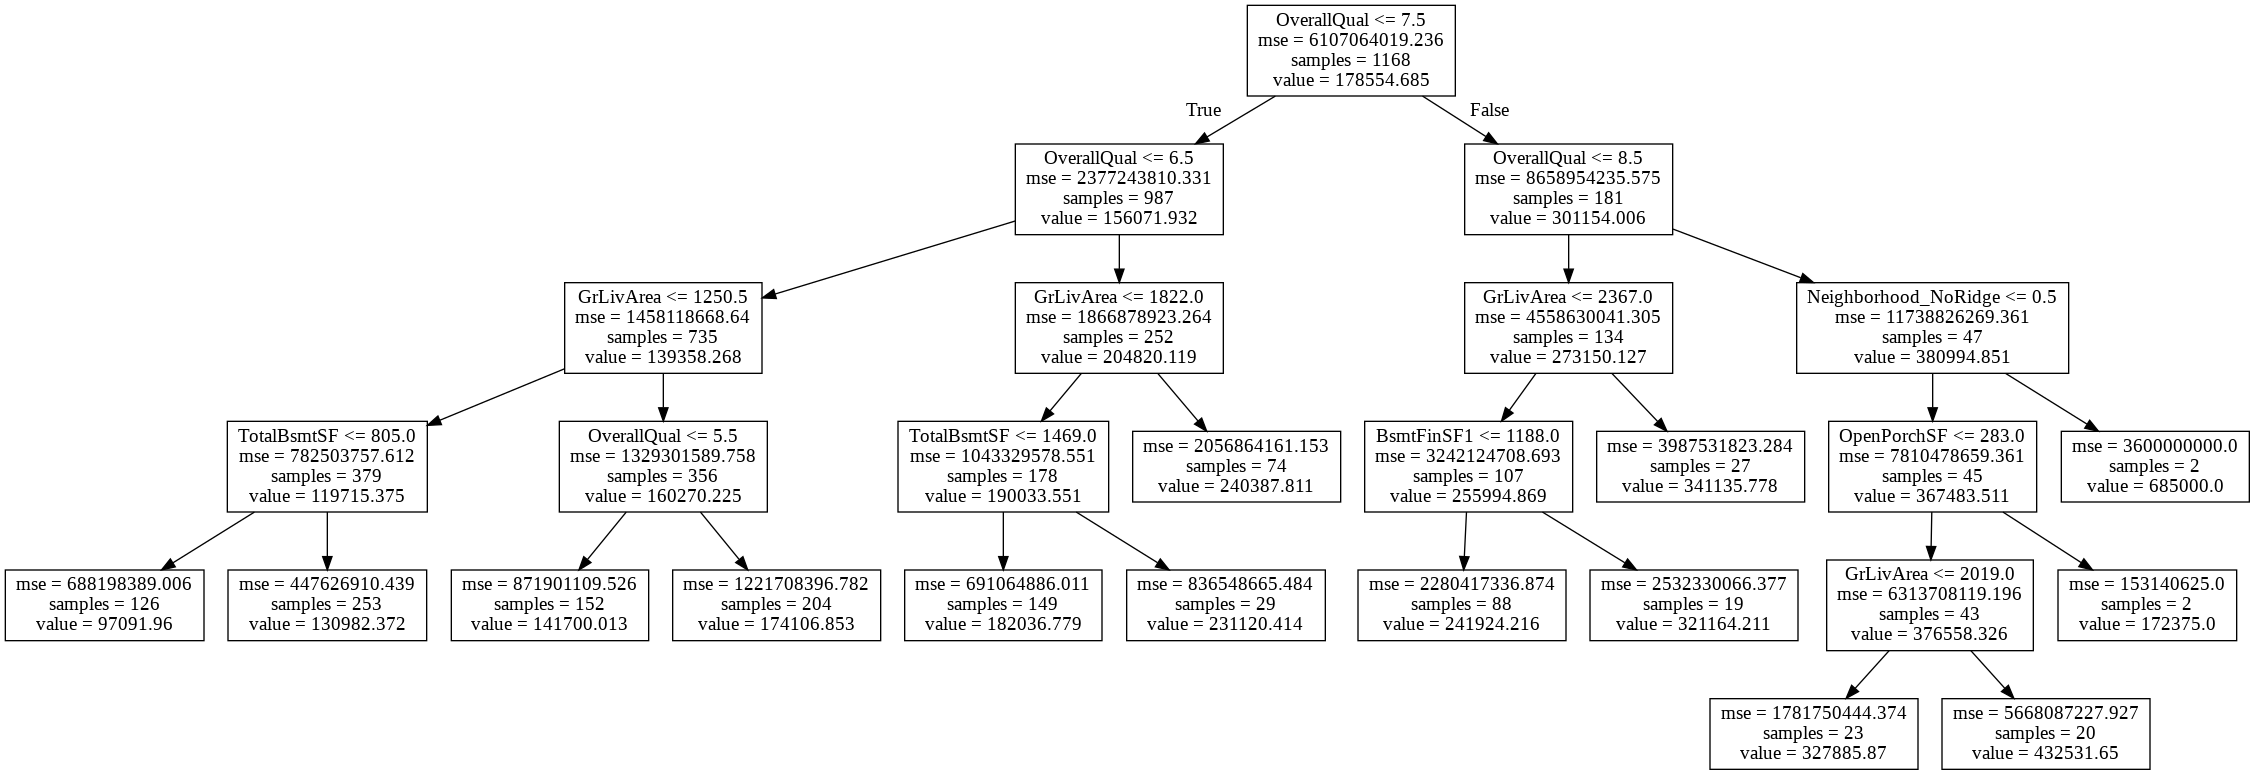

In [74]:
from IPython.display import Image
Image(filename='/content/tree.png')

**Predecimos los valores de test**

In [75]:
y_pred = arbol.predict(X_test)

**Hallamos métricas de evaluación del algoritmo, se puede elegir entre el error cuadrático medio o su raíz**

In [76]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 29345.196378122288
Mean Squared Error: 1997411637.3376904
Root Mean Squared Error: 44692.411406610074
R2: 0.7143975964011027


In [77]:
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(arbol.score(X_train, y_train), arbol.score(X_test, y_test)))

Precisión modelo inicial train/test  0.807/0.714


**Comentamos los resultados**

Como podemos observar la precisión obtenida con el árbol de regresión no es muy alta. Esto puede deberse a que tenemos variables categóricas con muchos niveles. 
Además se sabe que pequeños cambios en los datos de entrenamiento dan lugar a grandes cambios en la lógica de decisión, por lo que la forma en la que se han tratado los missing y el criterio para eliminar variables podría influenciar en la precisión.
Por otro lado, al tratar con árboles de decisión hay que tener en cuenta que tienen tendencia al overfitting si no se poda de la manera correcta. En este caso hemos utilizado la función GridSearchCV para encontrar la mejor combinación de profundidad y número de hojas.

### 3.2. Con random forest

**Separamos la data en entrenamiento y test**

In [78]:
# Get dummies
USA_Housing_2 = USA_Housing.copy()
USA_Housing_2 = pd.get_dummies(USA_Housing, columns=columns, drop_first=True)

X = USA_Housing_2.drop(['SalePrice'], axis=1)  
y = USA_Housing_2['SalePrice']

# Dividimos los datos entre test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Creamos el modelo**

In [79]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 100, bootstrap=True)
dt_params = {'max_depth':np.arange(1,15,1),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params, cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_
print(a)

{'max_depth': 10, 'min_samples_leaf': 2}


In [80]:
rf = RandomForestRegressor(n_estimators = 100, bootstrap=True, max_depth=10, min_samples_leaf = 2)

**Predecimos los valores de test**

In [81]:
rf.fit(X_train, y_train);

In [82]:
y_pred = rf.predict(X_test)

**Hallamos métricas de evaluación del algoritmo**

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 16138.985637282309
Mean Squared Error: 586490571.0276254
Root Mean Squared Error: 24217.567405245834
R2: 0.8938109681175055


**Comentamos los resultados**

Se puede observar que con el random forest obtenemos una precisión mucho más alta que en el árbol de decisión ya que se utilizan combinaciones de estos para hacer la predicción. Hemos puesto el parámetro bootstrap para que genere un muestreo con reemplazamiento del dataset. 

### 3.3.Comparación de ambos modelos

Como era de esperar, el modelo basado en random forest muestra unos resultados mejores debido a la utilización de múltiples árboles que se complementan entre si. Al final la predicción es la media de todos estos árboles, con lo cual se reduce el sesgo y por lo tanto el sobreajuste. 

## 4. Problema de clasificación

### 4.1. Con árboles de decisión 

In [92]:
USA_Housing_3 =  USA_Housing.copy()

In [93]:
condiciones =  [
    (USA_Housing_3['SalePrice'] <=100000),
    ((USA_Housing_3['SalePrice'] >=100001) & (USA_Housing_3['SalePrice'] <=500000)),
    (USA_Housing_3['SalePrice'] >=500001)
]

elecciones = ['low', 'medium', 'high']

USA_Housing_3['SalePrice'] =  np.select(condiciones, elecciones)

USA_Housing_3.head()


,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,854,1710,1,2,1,3,Gd,0,Attchd,RFn,548,TA,0,61,2,2008,WD,Normal,medium
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,0,1262,0,2,0,3,TA,1,Attchd,RFn,460,TA,298,0,5,2007,WD,Normal,medium
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,866,1786,1,2,1,3,Gd,1,Attchd,RFn,608,TA,0,42,9,2008,WD,Normal,medium
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,756,1717,1,1,0,3,Gd,1,Detchd,Unf,642,TA,0,35,2,2006,WD,Abnorml,medium
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1053,2198,1,2,1,4,Gd,1,Attchd,RFn,836,TA,192,84,12,2008,WD,Normal,medium


In [94]:

USA_Housing_3['SalePrice'].value_counts()

medium    1328
low        123
high         9
Name: SalePrice, dtype: int64

Las categorías generadas se encuentran muy desbalanceadas. Cualquier modelo que hagamos con estas categorías sobreajustará, muy probablemente, a la categoría medium. Es por ello que hemos decidido separar esta categoría en 4 descritos a continuación. 

In [95]:
USA_Housing_3 =  USA_Housing.copy()

In [96]:
condiciones =  [  
    (USA_Housing_3['SalePrice'] <=100000),
    ((USA_Housing_3['SalePrice'] >=100001) & (USA_Housing_3['SalePrice'] <=200000)),
    ((USA_Housing_3['SalePrice'] >=200001) & (USA_Housing_3['SalePrice'] <=300000)),
    ((USA_Housing_3['SalePrice'] >=300001) & (USA_Housing_3['SalePrice'] <=400000)),
    ((USA_Housing_3['SalePrice'] >=400001) & (USA_Housing_3['SalePrice'] <=500000)),
    (USA_Housing_3['SalePrice'] >=500001)
]

elecciones = ['low', 'medium 1','medium 2','medium 3','medium 4' ,'high']

USA_Housing_3['SalePrice'] =  np.select(condiciones, elecciones)

USA_Housing_3.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,854,1710,1,2,1,3,Gd,0,Attchd,RFn,548,TA,0,61,2,2008,WD,Normal,medium 2
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,0,1262,0,2,0,3,TA,1,Attchd,RFn,460,TA,298,0,5,2007,WD,Normal,medium 1
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,866,1786,1,2,1,3,Gd,1,Attchd,RFn,608,TA,0,42,9,2008,WD,Normal,medium 2
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,756,1717,1,1,0,3,Gd,1,Detchd,Unf,642,TA,0,35,2,2006,WD,Abnorml,medium 1
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1053,2198,1,2,1,4,Gd,1,Attchd,RFn,836,TA,192,84,12,2008,WD,Normal,medium 2


In [97]:
USA_Housing_3['SalePrice'].value_counts()

medium 1    910
medium 2    312
low         123
medium 3     87
medium 4     19
high          9
Name: SalePrice, dtype: int64

**Separamos los datos de entrenamiento y test**

In [98]:

USA_Housing_3 = pd.get_dummies(USA_Housing_3, columns=columns, drop_first=True)

X = USA_Housing_3.drop(['SalePrice'], axis=1)  
y = USA_Housing_3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

**Decidimos si podar el árbol o no**

Utilizamos la función GridSearchCV para buscar la mejor combinación de profundidad y el número de hojas.

In [100]:
dt = DecisionTreeClassifier(criterion="entropy")
dt_params = {'max_depth':np.arange(1,15,1),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params, cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

In [101]:
print(a)

{'max_depth': 7, 'min_samples_leaf': 6}


**Predecimos los valores de test**

In [102]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=7,min_samples_leaf =6 )

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)


**Graficamos el árbol**

In [103]:

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import matplotlib.image as mpimg

dot_data = export_graphviz(dtc, feature_names =  X.columns.to_list())

graph = graph_from_dot_data(dot_data)
graph.write_png('tree_c.png')

True

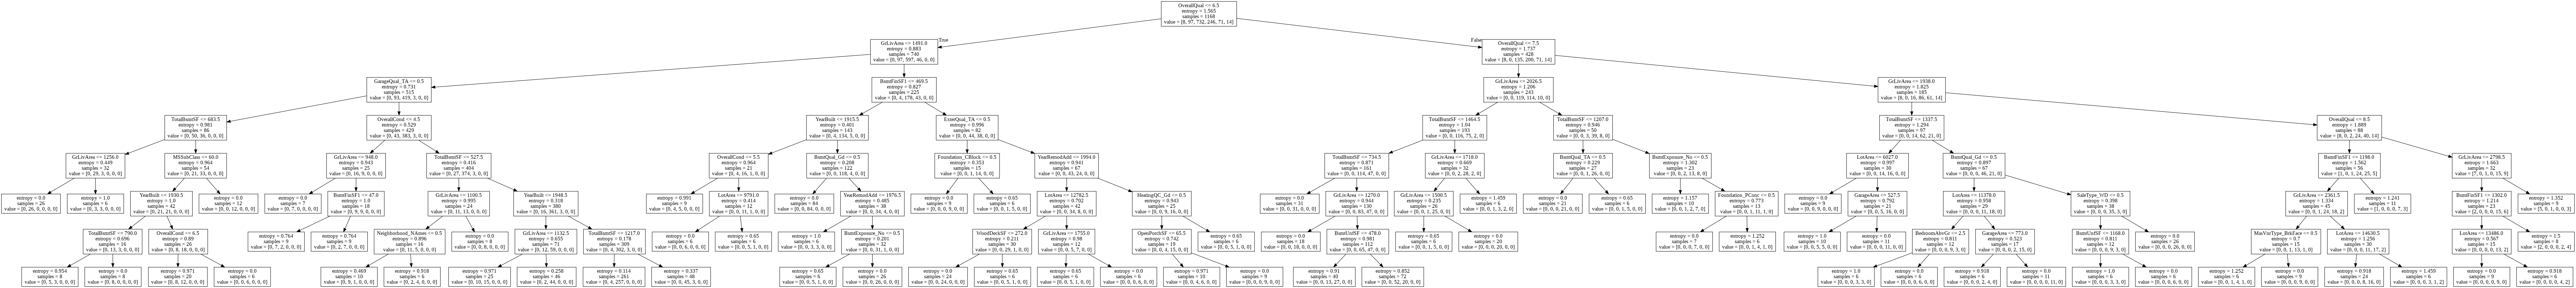

In [104]:
from IPython.display import Image
Image(filename='/content/tree_c.png')

**Creamos matriz de confusión y hallamos exactitud**

In [105]:
# Evaluamos el algoritmo con las métricas correspondientes
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Classification report:', metrics.classification_report(y_test, y_pred))
print('Confusion matrix:', metrics.confusion_matrix(y_test, y_pred))



Accuracy Score: 0.7671232876712328
Classification report:               precision    recall  f1-score   support

        high       0.00      0.00      0.00         1
         low       0.67      0.46      0.55        26
    medium 1       0.82      0.91      0.86       178
    medium 2       0.70      0.65      0.68        66
    medium 3       0.50      0.38      0.43        16
    medium 4       0.33      0.20      0.25         5

    accuracy                           0.77       292
   macro avg       0.50      0.43      0.46       292
weighted avg       0.75      0.77      0.76       292

Confusion matrix: [[  0   0   0   0   0   1]
 [  0  12  14   0   0   0]
 [  1   6 162   9   0   0]
 [  0   0  21  43   2   0]
 [  0   0   0   9   6   1]
 [  0   0   0   0   4   1]]


In [106]:
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Precisión modelo inicial train/test  0.880/0.767


**Comentamos los resultados**

La precisión obtenida con este modelo es menor a la que se podría haber obtenido con un modelo que clasificara las categorías originales, sin embargo, esto habría sido debido a que dicho modelo sobreajustaría enormemente a la categoría desbalanceada. Nuestro modelo no es tan preciso pero generaliza mejor, que es al fin y al cabo, el objetivo. 

### 4.2. Con random forest

**Creamos el modelo**

In [107]:
USA_Housing_4 =  USA_Housing.copy()

condiciones =  [  
    (USA_Housing_4['SalePrice'] <=100000),
    ((USA_Housing_4['SalePrice'] >=100001) & (USA_Housing_4['SalePrice'] <=200000)),
    ((USA_Housing_4['SalePrice'] >=200001) & (USA_Housing_4['SalePrice'] <=300000)),
    ((USA_Housing_4['SalePrice'] >=300001) & (USA_Housing_4['SalePrice'] <=400000)),
    ((USA_Housing_4['SalePrice'] >=400001) & (USA_Housing_4['SalePrice'] <=500000)),
    (USA_Housing_4['SalePrice'] >=500001)
]

elecciones = ['low', 'medium 1','medium 2','medium 3','medium 4' ,'high']

USA_Housing_4['SalePrice'] =  np.select(condiciones, elecciones)

USA_Housing_4.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,854,1710,1,2,1,3,Gd,0,Attchd,RFn,548,TA,0,61,2,2008,WD,Normal,medium 2
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,0,1262,0,2,0,3,TA,1,Attchd,RFn,460,TA,298,0,5,2007,WD,Normal,medium 1
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,866,1786,1,2,1,3,Gd,1,Attchd,RFn,608,TA,0,42,9,2008,WD,Normal,medium 2
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,756,1717,1,1,0,3,Gd,1,Detchd,Unf,642,TA,0,35,2,2006,WD,Abnorml,medium 1
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1053,2198,1,2,1,4,Gd,1,Attchd,RFn,836,TA,192,84,12,2008,WD,Normal,medium 2


**Separamos los datos de entrenamiento y de test**

In [108]:

USA_Housing_4 = pd.get_dummies(USA_Housing_4, columns=columns, drop_first=True)

X = USA_Housing_4.drop(['SalePrice'], axis=1)  
y = USA_Housing_4['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
dt = RandomForestClassifier(bootstrap = True)
dt_params = {'max_depth':np.arange(1,15,1),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params, cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

In [111]:
print(a)

{'max_depth': 14, 'min_samples_leaf': 2}


**Predecimos los valores de test**

In [112]:

dtc = RandomForestClassifier(bootstrap = True, max_depth=14,min_samples_leaf =2 )

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

**Creamos matriz de confusión y hallamos exactitud**

In [113]:

from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Classification report:', metrics.classification_report(y_test, y_pred))
print('Confusion matrix:', metrics.confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8493150684931506
Classification report:               precision    recall  f1-score   support

        high       0.00      0.00      0.00         2
         low       0.92      0.52      0.67        23
    medium 1       0.88      0.96      0.92       187
    medium 2       0.75      0.77      0.76        57
    medium 3       0.80      0.60      0.69        20
    medium 4       0.00      0.00      0.00         3

    accuracy                           0.85       292
   macro avg       0.56      0.48      0.51       292
weighted avg       0.84      0.85      0.84       292

Confusion matrix: [[  0   0   0   0   1   1]
 [  0  12  11   0   0   0]
 [  0   1 180   6   0   0]
 [  0   0  13  44   0   0]
 [  0   0   0   8  12   0]
 [  0   0   0   1   2   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comentamos los resultados**

Como comentábamos en el caso de la regresión, la precisión es mejor cuando se utiliza random forest. Además, como en el caso anterior, la precisión no es tan alta como si hubieramos utilizado las clases originales por los motivos mencionados anteriormente.

### 4.3. Comparación de ambos modelos 

Por un lado, la peor precisión la hemos obtenido con el árbol de decisión en el problema de regresión. 
Por otro lado, los mejores resultados los hemos obtenido con el random forest para regresión, aunque sabemos que nos hubiera salido más alta en el problema de clasificación si no hubiéramos añadido las clases. 